In [2]:
import numpy as np

In [3]:
data = np.genfromtxt('./ASTR19_F24_group_project_data.txt', dtype=[('day', 'i8'), ('time', 'U6'), ('height', 'f8')])

#empty lists to be filled with column data
day = []
time = []
height = []

for i in range(82):
    #assign first, second and third columns to day, time, and height
    day.append(data[i][0])
    time.append(data[i][1])
    height.append(data[i][2])
    
print(day)
print('')
print(time)
print('')
print(height)

[1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 20, 20, 21, 21, 22, 22, 23, 23, 24, 24, 25, 25, 26, 26, 27, 27, 28, 28, 29, 29, 30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41]

['8:07', '15:37', '8:55', '16:25', '9:45', '17:14', '10:35', '18:00', '11:28', '18:46', '12:22', '19:31', '13:24', '20:16', '3:22', '21:01', '4:07', '21:46', '4:50', '11:58', '5:31', '12:56', '6:08', '13:45', '6:47', '14:25', '7:22', '15:00', '7:59', '15:34', '8:34', '16:08', '9:10', '16:41', '9:45', '17:12', '10:21', '17:45', '10:57', '18:15', '11:38', '18:48', '12:25', '19:20', '2:22', '19:52', '2:58', '20:30', '3:37', '10:44', '4:23', '11:55', '5:15', '12:57', '6:09', '13:50', '7:05', '14:39', '7:58', '15:27', '8:50', '16:10', '9:40', '16:52', '10:30', '17:34', '11:19', '18:12', '12:10', '18:49', '1:32', '19:24', '2:13', '20:00', '2:54', '9:54', '3:39', '11:15', '4:29', '12:22

In [4]:
percents = []
for times in time:
    hourmin = times.split(':')
    percent = (float(hourmin[0]) + float(hourmin[1])/60) /24
    percents.append(percent)
daytime = [percent + daynum for percent, daynum in zip(percents, day)]

In [5]:
import matplotlib.pyplot as plt

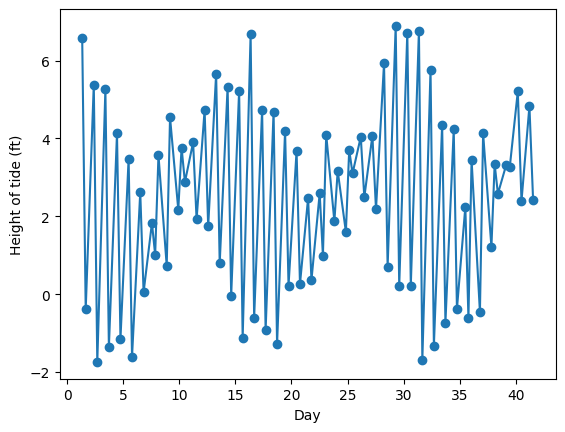

In [6]:
plt.plot(daytime, height, '-o')
plt.xlabel('Day')
plt.ylabel('Height of tide (ft)')
plt.show()

In [7]:
#Function to fit the data to should be in the form of a sine or cosine function times another cosine function--graph 4 cos(x/2) * sin(8x)
#on a graphing app for an example of what the function should look like
from scipy import optimize

In [13]:
def f_line(x, a, b, c, d, e, f):
    return (a * np.sin((b * x) + c)) * np.sin((d * x) + e) + f

params, params_cov = optimize.curve_fit(f_line, daytime, height, sigma=np.full(len(daytime), 0.25), p0=[4.,1.,7.5,1.,1.,2.])

a_fit = params[0]
b_fit = params[1]
c_fit = params[2]
d_fit = params[3]
e_fit = params[4]
f_fit = params[5]

print(a_fit, b_fit, c_fit, d_fit, e_fit, f_fit)

height_fit = f_line(np.array(daytime), a_fit, b_fit, c_fit, d_fit, e_fit, f_fit)
print(height_fit)

0.517820683528549 1.073423785419435 8.221387840743313 1.0064824367022718 -1.6299883031734 2.4160325247634904
[2.44944121 2.4072784  2.06970022 1.96403838 2.09544902 2.26222504
 2.47908751 2.41276836 2.06644455 1.98624118 2.17664767 2.33839878
 2.50747509 2.42347441 2.2802276  2.02262587 2.06230188 2.41886109
 2.53220688 2.56130117 2.29030502 2.14624097 2.13005562 2.27612969
 2.59484757 2.60166147 2.31148321 2.17362521 2.20203715 2.35725978
 2.6554751  2.64437392 2.33648566 2.21085581 2.2762893  2.43563983
 2.71353189 2.68584276 2.36267185 2.25105524 2.35382669 2.51215131
 2.76686832 2.72371402 2.60455018 2.29015034 2.28063795 2.58743533
 2.73166115 2.80853572 2.61857136 2.4580377  2.33720066 2.4514736
 2.80396974 2.85456618 2.61039595 2.45509477 2.39779745 2.52918971
 2.86360856 2.88355355 2.59639205 2.45738699 2.4548946  2.59229903
 2.90455518 2.899272   2.57592036 2.45770919 2.40524366 2.64022898
 2.78936054 2.90285448 2.79894657 2.6484916  2.4153447  2.47928151
 2.82964832 2.9260063

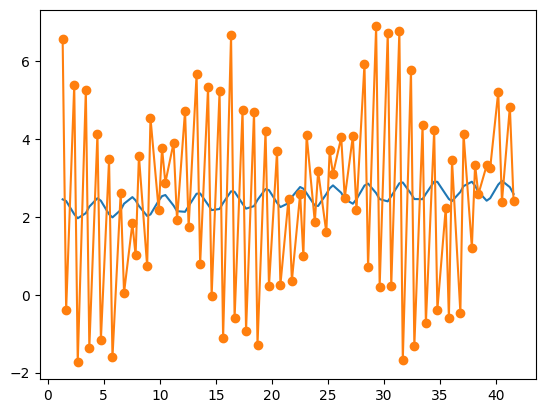

In [10]:
plt.plot(daytime, height_fit)
plt.plot(daytime, height, '-o')
plt.show()